In [1]:
import pandas as pd

data = {'date': ['2021-08-15', '2021-08-16', '2021-08-17'],
        'value': [100, 200, 150]}
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'])
print(df)



        date  value
0 2021-08-15    100
1 2021-08-16    200
2 2021-08-17    150


In [5]:
import pandas as pd

data = {'date': ['2022-01-01', '2022-01-02', '2022-01-01', '2022-01-02', '2022-01-01', '2022-01-02'],
        'location': ['서울', '서울', '부산', '부산', '대구', '대구'],
        'PM10': [50, 40, 45, 55, 60, 65],
        'PM2.5': [25, 20, 22, 28, 30, 35]}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

df_monthly = df.groupby('location').resample('D', on='date').mean(numeric_only=True) #수치값들만 평균취한다
print(df_monthly)




                     PM10  PM2.5
location date                   
대구       2022-01-01  60.0   30.0
         2022-01-02  65.0   35.0
부산       2022-01-01  45.0   22.0
         2022-01-02  55.0   28.0
서울       2022-01-01  50.0   25.0
         2022-01-02  40.0   20.0


In [6]:
import pandas as pd

data = {'date': ['2022-01-01', '2022-01-02', '2022-02-01', '2022-02-02', '2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02', '2022-01-01', '2022-01-02', '2022-02-01', '2022-02-02', '2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02'],
        'location': ['서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산'],
        'PM10': [50, 40, 45, 55, 60, 65, 70, 80, 55, 45, 50, 60, 70, 75, 80, 90],
        'PM2.5': [25, 20, 22, 28, 30, 35, 40, 45, 30, 25, 28, 35, 40, 42, 45, 50]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

df_monthly = df.groupby('location').resample('M', on='date').mean(numeric_only=True) #수치값들만 평균취한다
print(df_monthly)

                     PM10  PM2.5
location date                   
부산       2022-01-31  50.0   27.5
         2022-02-28  55.0   31.5
         2022-03-31   NaN    NaN
         2022-04-30   NaN    NaN
         2022-05-31   NaN    NaN
         2022-06-30   NaN    NaN
         2022-07-31   NaN    NaN
         2022-08-31   NaN    NaN
         2022-09-30   NaN    NaN
         2022-10-31   NaN    NaN
         2022-11-30   NaN    NaN
         2022-12-31   NaN    NaN
         2023-01-31  72.5   41.0
         2023-02-28  85.0   47.5
서울       2022-01-31  45.0   22.5
         2022-02-28  50.0   25.0
         2022-03-31   NaN    NaN
         2022-04-30   NaN    NaN
         2022-05-31   NaN    NaN
         2022-06-30   NaN    NaN
         2022-07-31   NaN    NaN
         2022-08-31   NaN    NaN
         2022-09-30   NaN    NaN
         2022-10-31   NaN    NaN
         2022-11-30   NaN    NaN
         2022-12-31   NaN    NaN
         2023-01-31  62.5   32.5
         2023-02-28  75.0   42.5


In [13]:
import pandas as pd

# 데이터 파일 경로
data_path = '일별평균대기오염도_2022.csv'

# CSV 파일 읽기
df = pd.read_csv(data_path, encoding="cp949")

# 필요한 필드 추출
df = df[['측정일시', '측정소명', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)']]

# 결측치 처리
df = df.dropna()

df.info() #데이터 타입 확인. 인트인지~ 측정일시가 int니까 날짜로 타입변환
df.head() #어떤 데이터 형태로 들어가있는지 윗부분만 확인

# 측정일시 컬럼의 데이터 타입을 datetime으로 변경
df['측정일시'] = pd.to_datetime(df['측정일시'])
df.head()
#그냥 넣으니까 엉망이다. 아래 markdown 부분 봐봐. 자동으로 인식하는건 %Y-%m-%d 이런식.
#즉 2023-10-23 이런 형태를 인식하고있네.
#20231023 으로 붙어있다 -> %Y%m%d 이렇게 붙어있는 형태네
#2023년 10월 23일 형태로 되어있으면
#format = '%Y년 %m월 %d일' 이렇게 되어있다고 알려주면 된다.
#23일 2023년 10월 이렇게 적혀있으면
#format = '%d일 %Y년 %d월' 이렇게.

df['측정일시'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')
df.head()
print(df.head(20))


<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 0 to 18249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18105 non-null  int64  
 1   측정소명          18105 non-null  object 
 2   미세먼지농도(㎍/㎥)   18105 non-null  float64
 3   초미세먼지농도(㎍/㎥)  18105 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 707.2+ KB
         측정일시    측정소명  미세먼지농도(㎍/㎥)  초미세먼지농도(㎍/㎥)
0  2022-01-01     강남구         25.0          12.0
1  2022-01-01     홍릉로         27.0          16.0
2  2022-01-01      행주         27.0          16.0
3  2022-01-01      항동         27.0          14.0
4  2022-01-01    한강대로         34.0          14.0
5  2022-01-01    청계천로         27.0          16.0
6  2022-01-01    천호대로         38.0          17.0
7  2022-01-01     중랑구         25.0          12.0
8  2022-01-01      중구         28.0          17.0
9  2022-01-01     종로구         27.0          15.0
10 2022-01-01      종로         34.0  

to_datetime에서 자동으로 인식하는 날짜 형식  
%Y-%m-%d %H:%M:%S.%f  
%Y-%m-%d %H:%M:%S  
%Y-%m-%d %H:%M  
%Y-%m-%d  
%m/%d/%Y %H:%M:%S  
%m/%d/%Y %H:%M  
%m/%d/%Y  
%m/%d/%y %H:%M:%S  
%m/%d/%y %H:%M  
%m/%d/%y  



In [20]:
# 연도별 미세먼지와 초미세먼지 농도 평균 계산
df_monthly = df.resample('M', on='측정일시').mean(numeric_only=True)
df_monthly

df_monthly = df.resample('Q', on='측정일시').mean(numeric_only=True)
df_monthly

,미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
측정일시,,
2022-03-31,42.385360,25.144820
2022-06-30,35.116453,17.068152
2022-09-30,22.969743,12.535190
2022-12-31,34.761926,18.280088


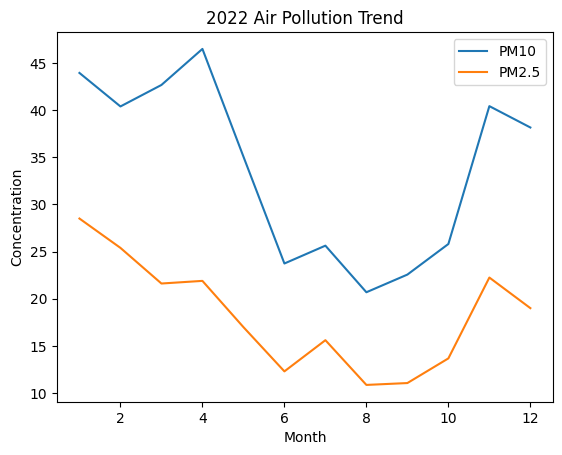

In [18]:
import matplotlib.pyplot as plt


# 그래프 그리기
plt.plot(df_monthly.index.month, df_monthly['미세먼지농도(㎍/㎥)'], label='PM10')
plt.plot(df_monthly.index.month, df_monthly['초미세먼지농도(㎍/㎥)'], label='PM2.5')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.title('2022 Air Pollution Trend')
plt.show()
